<a href="https://colab.research.google.com/github/oublalkhalid/MoroccoAI-Data-Challenge/blob/main/training/Part_2_Training_Yolo_on_arabic_caracters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connecting Drive and creating a sym link**

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive


#**Cloning and Building Darknet**
Our team is using the Darknet library to train the YOLOv3 model with the custom data we obtained. Downloading the library from pjreddie/darknet's repository, and adjusting Makefile to enable OPENCV and GPU for darknet and then building the darknet.

In [ ]:
# cloning darknet repo
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5904, done.
remote: Total 5904 (delta 0), reused 0 (delta 0), pack-reused 5904
Receiving objects: 100% (5904/5904), 6.17 MiB | 4.92 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.


In [ ]:
# changing the makefile to have GPU and OpneCv enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/darknet


In [ ]:
# Making sure to use GPU with CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# Building the darknet
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN 

### **Copy YoloLicensePlateDataArchive to Colab VM**


In [ ]:
# This has all the images data that we use to train and test
!cp /mydrive/LicensePlate/YoloCharacterDataArchive.zip ../

### **Extracting zip to Colab VM under darket/custom folder**

In [ ]:
!unzip ../YoloCharacterDataArchive.zip -d ../darknet/custom

Archive:  ../YoloCharacterDataArchive.zip
   creating: ../darknet/custom/dataset/
  inflating: ../darknet/custom/dataset/characters.data  
   creating: ../darknet/custom/__MACOSX/
   creating: ../darknet/custom/__MACOSX/dataset/
  inflating: ../darknet/custom/__MACOSX/dataset/._characters.data  
  inflating: ../darknet/custom/dataset/.DS_Store  
  inflating: ../darknet/custom/__MACOSX/dataset/._.DS_Store  
   creating: ../darknet/custom/dataset/images/
  inflating: ../darknet/custom/dataset/images/m538_1.jpg  
   creating: ../darknet/custom/__MACOSX/dataset/images/
  inflating: ../darknet/custom/__MACOSX/dataset/images/._m538_1.jpg  
  inflating: ../darknet/custom/dataset/images/m639_1.jpg  
  inflating: ../darknet/custom/__MACOSX/dataset/images/._m639_1.jpg  
  inflating: ../darknet/custom/dataset/images/m580_1.jpg  
  inflating: ../darknet/custom/__MACOSX/dataset/images/._m580_1.jpg  
  inflating: ../darknet/custom/dataset/images/m559_0.jpg  
  inflating: ../darknet/custom/__MACOSX/d



# **Train the YOLOv3 model using the Darknet**

Darknet provides YOLOv3 model support that we used to train with our custom data. We are using `darknet53.conv.74` default weights to begin our training (transfer learning), and a configuration file `yolov3_chars.cfg` that supports out neural network layers. Upon trianing the model, we will have our custom weights that will be used to predict the license plates. 

Coping Default weights and custom config for Object detection from GDrive

### Coping Default weights and custom config for Object detection from GDrive

In [ ]:
!cp /mydrive/LicensePlate/darknet53.conv.74  ../darknet/
!cp /mydrive/LicensePlate/yolov3_chars.cfg  ../darknet/
!cp /mydrive/LicensePlate/train.txt  ../darknet/custom/dataset/
!cp /mydrive/LicensePlate/test.txt  ../darknet/custom/dataset/

# **Training the YOLOv3 model with CustomData**

In [ ]:
!./darknet detector train custom/dataset/characters.data yolov3_chars.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
Region 82 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000003, .5R: -nan, .75R: -nan,  count: 0
Region 94 Avg IOU: 0.859984, Class: 0.995380, Obj: 0.990807, No Obj: 0.003358, .5R: 1.000000, .75R: 0.964286,  count: 28
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000001, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000009, .5R: -nan, .75R: -nan,  count: 0
Region 94 Avg IOU: 0.833263, Class: 0.987793, Obj: 0.972515, No Obj: 0.003311, .5R: 1.000000, .75R: 0.962963,  count: 27
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000003, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000004, .5R: -nan, .75R: -nan,  count: 0
Region 94 Avg IOU: 0.843526, Class: 0.986083, Obj: 0.954102, No Obj: 0.004013, .5R: 1.000000, .75R: 0.928571,  count: 28
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000001, .5R: -nan, .75R:

# **Importing YOLOv3 custom Character Recognition Weights**

Google colab (pro) collapsed running the model here after 3669 epochs and we have set to run for 15000 epochs. We have used Amazon GPU install to run the same model with 10000 epochs and using those weights here to predict the plate number.

In [ ]:
!cp /mydrive/LicensePlate/yolov3_character_final.weights ../darknet/custom/models/

# **Image Utils**

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def upload():
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

def download(path):
  from google.colab import files
  files.download(path)


**Upload Image**

In [ ]:
# Uploading image to root directory
%cd ../darknet
upload()

/darknet


Saving m508_1.jpg to m508_1.jpg
saved file m508_1.jpg


**Predicted Image**

/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8              

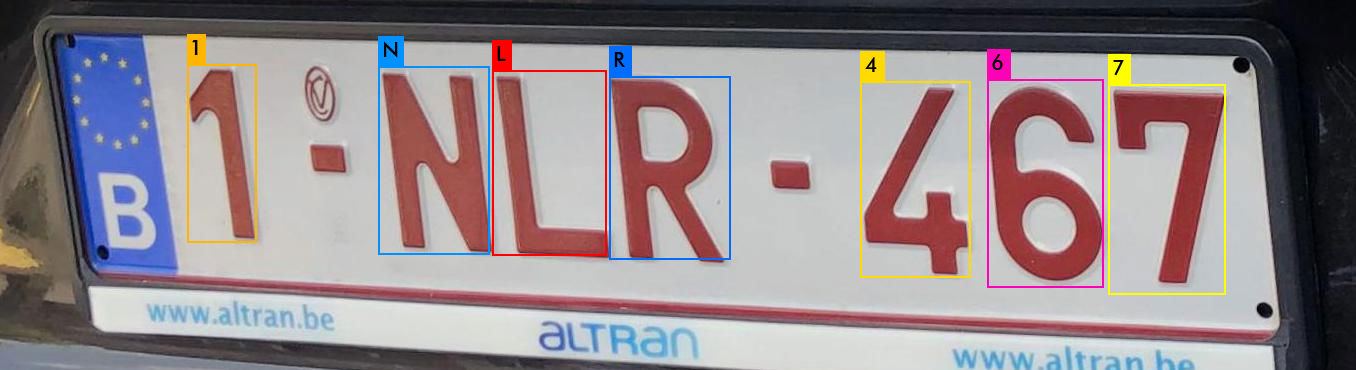

In [ ]:
# Prediction
from IPython.display import Image
%cd ../darknet
!./darknet detector test custom/dataset/characters.data yolov3_chars.cfg custom/models/yolov3_character_final.weights m508_1.jpg

Image('predictions.jpg')